In [2]:
import pandas as pd
import glob
import seaborn as sns

In [88]:
result_csv_paths = glob.glob("../data/output/0531/perf_parquet*.csv")

In [53]:
result_csv_paths = glob.glob("../data/output/perf_geojson*May_29*.csv")

In [89]:
result_csv_paths

['../data/output/0531/perf_parquet_5_4600_May_31_01_19_21.csv',
 '../data/output/0531/perf_parquet_5_650_May_29_16_16_22.csv',
 '../data/output/0531/perf_parquet_5_20000May_28_00_56_24.csv',
 '../data/output/0531/perf_parquet_3_8400_May_31_01_03_10.csv',
 '../data/output/0531/perf_parquet_4_7200_May_31_01_09_25.csv',
 '../data/output/0531/perf_parquet_5_300000May_28_23_57_32.csv',
 '../data/output/0531/perf_parquet_3_5800_May_31_00_59_56.csv',
 '../data/output/0531/perf_parquet_3_400_May_29_15_43_23.csv',
 '../data/output/0531/perf_parquet_4_650_May_29_16_09_31.csv',
 '../data/output/0531/perf_parquet_3_6200_May_31_01_00_21.csv',
 '../data/output/0531/perf_parquet_3_1000_May_31_00_51_37.csv',
 '../data/output/0531/perf_parquet_3_5400_May_31_00_59_09.csv',
 '../data/output/0531/perf_parquet_3_150_May_29_15_35_36.csv',
 '../data/output/0531/perf_parquet_4_2000_May_31_01_05_40.csv',
 '../data/output/0531/perf_parquet_5_700_May_29_16_16_49.csv',
 '../data/output/0531/perf_parquet_5_3200_Ma

In [90]:
result = pd.concat([pd.read_csv(f"{fn}") for fn in result_csv_paths])

In [91]:
sns_df = result.groupby(['prec','radius_meter']).median().reset_index()

In [109]:
result.groupby('id').fetched.first().reset_index().sort_values('fetched',ascending=False)

,id,fetched
97,2251799820327070,8775
51,366492367327289,7865
31,151865018773955,5348
77,815036591907027,4420
10,110988814151526,3906
...,...,...
34,155328524613646,1
18,123049374408781,1
29,146467672039517,1
28,145810178886775,1


In [98]:
result.id.unique()

array([ 107603119267331,  366492367327289,  141913785840982,
        335523389829550,  815036591907027,  979382765507018,
       1459816170975554,  438601312892825,  198059460557723,
        393111361079427, 2251799820327070,  562949964794408,
        495849503911195,  295186763868647,  593792474015891,
        218530648198352,  562949964278032,  144702872217522,
        105673652823792,  119862201397118,  404633976229138,
        143267839017641,  110463589034917, 1298981003573040,
       1479318132314001,  385168508185372,  460622284010506,
        294774530725248,  117143914970749, 2295459087342179,
        404475902903444,  437577112965905, 1429484157323387,
       1552082911782966, 1549946578664256, 2251799819300783,
        101025748676711, 1428343417493981,  123616834352622,
        117798781604778,  179839149421255,  132834494020148,
        123034394410268,  198971640552787,  139028642799536,
        175639546498078, 1970324838415111,  593078611107597,
        145810178886775,

<Axes: xlabel='radius_meter', ylabel='query_time'>

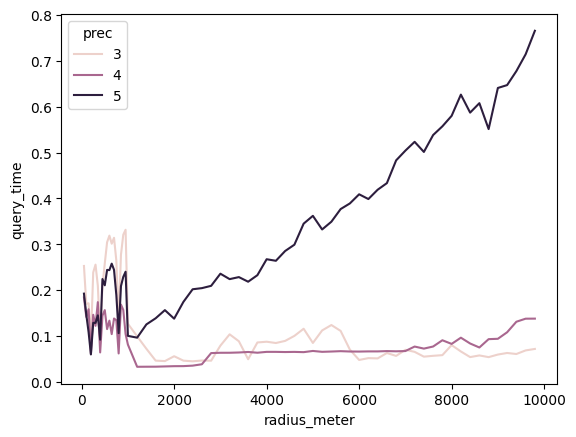

In [93]:
sns.lineplot(x="radius_meter", y="query_time",
             hue="prec", 
             data=sns_df.query('radius_meter < 10000'))

In [95]:
result['avg'] = result.eval('1.0*(hash_time + query_time+ join_time) / fetched')

<Axes: xlabel='radius_meter', ylabel='query_time'>

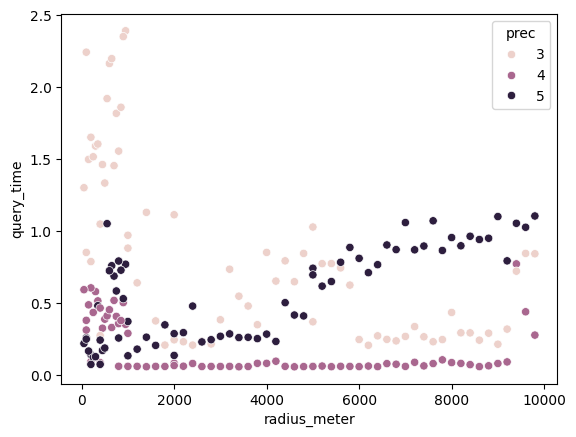

In [110]:
sns.scatterplot(x="radius_meter", y="query_time",
             hue="prec", 
             data=result.query('radius_meter < 10000 \
             and id == 2251799820327070'))

<Axes: xlabel='radius_meter', ylabel='avg'>

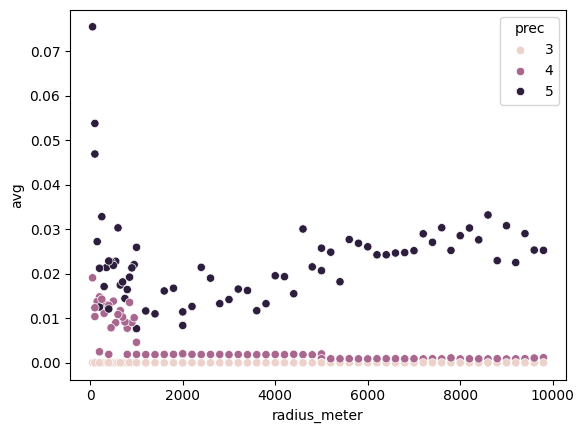

In [102]:
sns.scatterplot(x="radius_meter", y="avg",
             hue="prec", 
             data=result.query('radius_meter < 10000 \
             and id == 1459816170975554'))